In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.Chem import AllChem as ch
from rdkit.Chem import Draw as d
import pandas as pd
from rdkit import DataStructs
import collections
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Fingerprints import FingerprintMols
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('../0 data preparation/All.csv',usecols=['ID','Standard_Smiles'])
df.rename(columns={'Standard_Smiles':'Smiles'},inplace=True)
df=df.drop_duplicates(subset='ID')
df.reset_index(drop=True,inplace=True)
df

,ID,Smiles
0,TPCN02029,C=CC1(C)CC(=O)C2(O)C(C)(O1)C(O)C(OC(C)=O)C1C(C...
1,TPCN02063,C=CC1(C)CC(=O)C2(O)C(C)(O1)C(OC(C)=O)C(OC(C)=O...
2,TPCN02186,CC=C(C)C(=O)OC1C2C(OC(=O)CC(C)C)C(C)CC2(O)C(=O...
3,TPCN02187,CC1CCC2(C)C(C(=O)O)=CC(OC(=O)c3ccccc3)CC2C1(C)...
4,TPCN02188,CC1=C(CCc2ccoc2)C2(C)CCC(=O)C3(C)C(=O)OC(C1=O)C23
...,...,...
6378,TPCN06379,C=C1CCC23CCC4(C)C5(C)CCC6C(C)(CO)C(O)CCC6(C)C5...
6379,TPCN06380,CC1=CCC(C(C)C2CCC3(C)C4=C(CCC23C)C2OC23C=CC(=O...
6380,TPCN06381,CC(=O)OC1CC2(C)C(C(C)C3CC=C(C)C(=O)O3)CCC2(C)C...
6381,TPCN06382,CC1=CCC(C(C)C2CCC3(C)C4=C(C=C5C=CC(=O)OC(C)(C)...


### * Similarity calculation

### 1. Smiles to Mols

In [3]:
database=[]
for i in range(len(df)):
    smiles=df['Smiles'][i]
    terpenoidsid=df['ID'][i]
    mol=Chem.MolFromSmiles(smiles)
    mol.SetProp('ID',terpenoidsid)
    database.append(mol)

### 2. Drawing

D:\Anaconda3\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:192: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


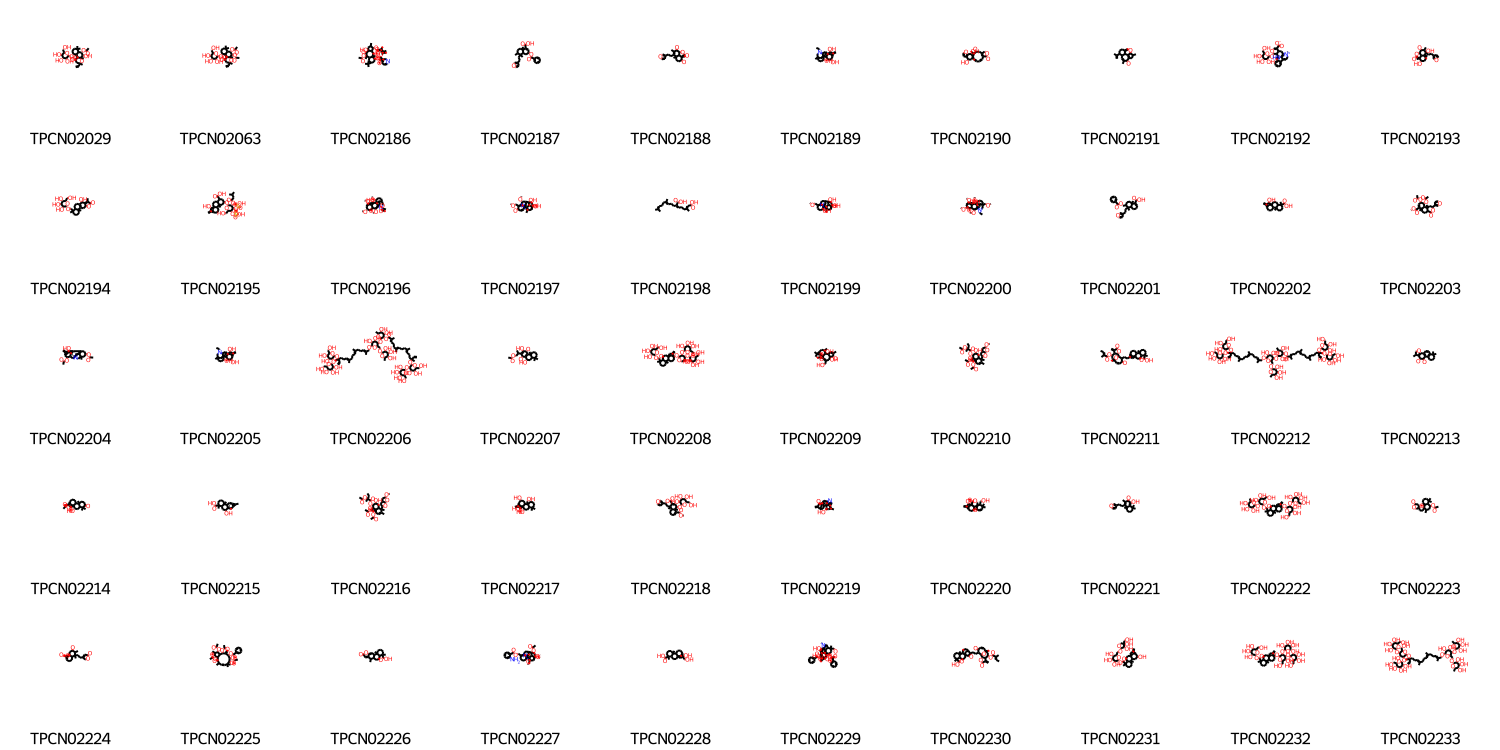

In [4]:
Draw.MolsToGridImage(database,molsPerRow=10,subImgSize=(150,150),legends=[mol.GetProp('ID') for mol in database])

### 3. Calculation of molecular fingerprints

In [5]:
fps=[FingerprintMols.FingerprintMol(mol) for mol in database]
len(fps)

6383

### 4. Similarity between molecules

In [6]:
DataStructs.FingerprintSimilarity(fps[0],fps[1])

0.9721627408993576

In [7]:
size=len(database)
hmap=np.empty(shape=(size,size))
table=pd.DataFrame()
for index, i in enumerate(fps):
    for jndex, j in enumerate(fps):
        # 默认度量方法是Tanimoto相似性
        similarity=DataStructs.FingerprintSimilarity(i,j)
        hmap[index,jndex]=similarity
        table.loc[database[index].GetProp('ID'),database[jndex].GetProp('ID')]=similarity

In [8]:
table.to_csv('similarity.txt', sep='\t',index=False)